In [ ]:
!pip install lifelines

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 350.7/350.7 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.9/88.9 kB 5.9 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=494e7a8f8077aa626851e196bcec31bed3ae38f648b3297c11c51325ceec4a5a
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter

In [ ]:
# Nuevos datos proporcionados
tiempos_supervivencia = [44.1, 4.3, 43.8, 68.6, 40.6, 69, 42.1, 43, 37.1, 51.3, 29.6, 44.3, 59.5, 46, 69.3, 62.1, 69.3, 21, 19.3, 63.5, 24.1, 29.6, 33.1, 36.1, 30.3, 44.1]
estados = [1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1]

In [ ]:
# Crear un objeto KaplanMeierFitter y ajustar los nuevos datos
kmf = KaplanMeierFitter()
kmf.fit(tiempos_supervivencia, event_observed=estados)


<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 26 total observations, 7 right-censored observations>

In [ ]:
# Calcular el tiempo correspondiente a la mediana
median_time = kmf.median_survival_time_

In [ ]:
# Crear una figura
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

Text(54.1, 0.6, 'Valor RLS: 44.10 horas')

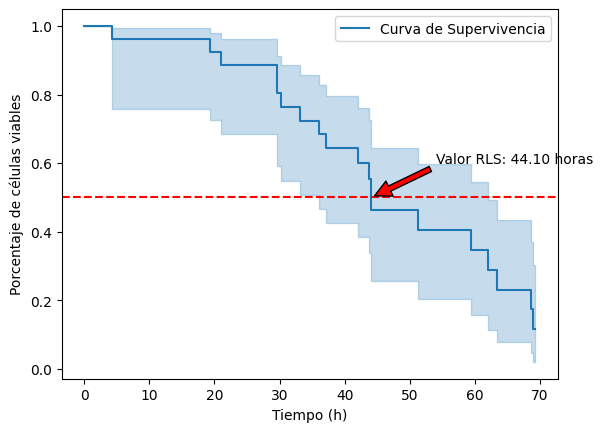

In [ ]:
# Graficar la curva de supervivencia
kmf.plot(label='Curva de Supervivencia')
# Etiquetas de ejes
plt.xlabel('Tiempo (h)')
plt.ylabel('Porcentaje de células viables')
# Encontrar la mediana (tiempo correspondiente a 0.5 en el eje y)
median_survival = 0.5
median_label = f'Valor RLS: {median_time:.2f} horas'
plt.axhline(y=median_survival, color='red', linestyle='--')
plt.annotate(median_label, xy=(median_time, median_survival), xytext=(median_time + 10, median_survival + 0.1), arrowprops=dict(facecolor='red', shrink=0.05))

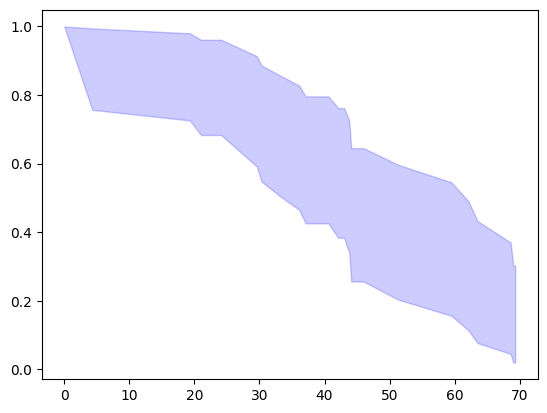

In [ ]:
# Graficar intervalos de confianza
intervalos_confianza = kmf.confidence_interval_
plt.fill_between(intervalos_confianza.index, intervalos_confianza['KM_estimate_lower_0.95'], intervalos_confianza['KM_estimate_upper_0.95'], alpha=0.2, color='blue', label='Intervalo de Confianza (95%)')